In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [14]:
img_path = './data/frog'

files = os.listdir(img_path)
files.sort()
files = [f for f in files if 'jpg' in f]

img_list = []
for fl in files : 
    im = cv2.imread(img_path + '/' + fl)[::2,::2]
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  / 255
    img_list.append(im)
img_list = np.array(img_list)

In [15]:
@np.vectorize
def srgb2lin(s):
    if s <= 0.0404482362771082:
        lin = s / 12.92
    else:
        lin = pow(((s + 0.055) / 1.055), 2.4)
    return lin


imgs_lin = srgb2lin(img_list)
# images_lin = images.copy()

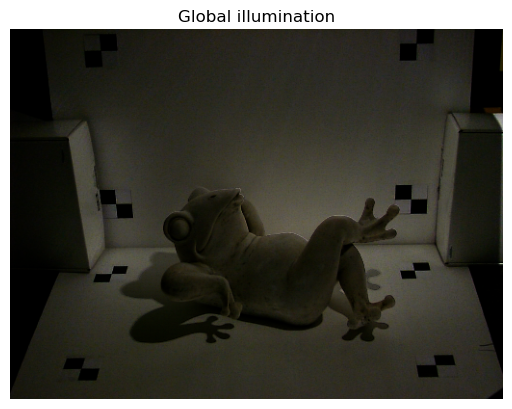

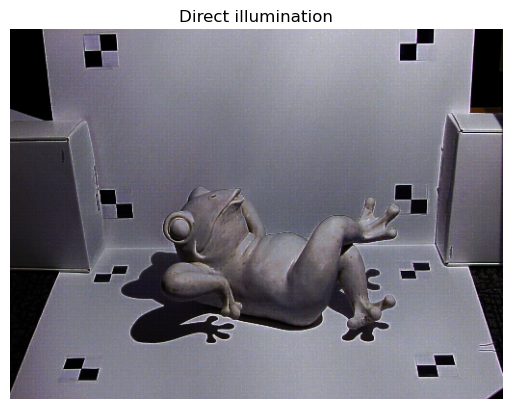

In [16]:
img_max = np.max(imgs_lin,0)  # dir + glob
img_min = np.min(imgs_lin,0)  # glob
img_glob = img_min
img_dir = img_max - img_min

plt.figure()
plt.imshow(img_glob)
plt.title('Global illumination')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(img_dir)
plt.title('Direct illumination')
plt.axis('off')
plt.show()

In [23]:
import re

def sort_key(filename):
    # Use regular expression to find the number in the filename
    match = re.search(r'frame_(\d+).png', filename)
    # If the pattern is found, return the number as an integer
    if match:
        return int(match.group(1))
    # If no number is found, return a default value
    return 0

# Define the path to the directory containing the images
img_path = './data/my/jar'
# img_path = './data/my/fork'

# List all files in the directory
files_list = os.listdir(img_path)

files_list = [f for f in files_list if f.endswith('.png')]

# Sort the files using the custom sort function
files_list.sort(key=sort_key)

# Initialize an empty list to store the images
img_list = []

# Iterate over the sorted and filtered list of image files
for file_name in files_list:
    # Construct the full path to the image file
    full_path = os.path.join(img_path, file_name)

    # Read the image from the file
    img = cv2.imread(full_path)
    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
    img = img[:, 400:1550]
    
    #apply bilateral filter
    # plt.imshow(img, cmap='gray')

    # Append the processed image to the list
    img_list.append(img)

# Convert the list of images to a NumPy array for further processing
img_list = np.array(img_list)

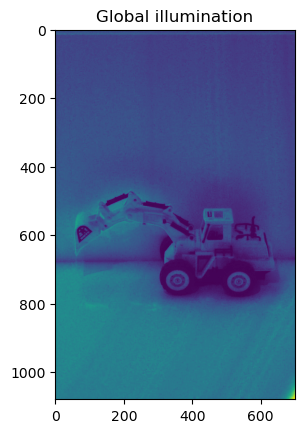

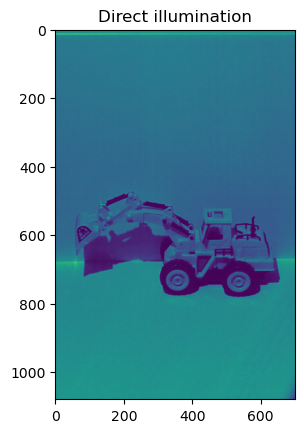

In [22]:
imgs_lin = srgb2lin(img_list[:, :, 200:900])

img_max = np.max(imgs_lin,0)  # dir + glob
img_min = np.min(imgs_lin,0)  # glob
img_glob = img_min
img_dir = img_max - img_min

plt.figure()
plt.imshow(img_glob)
plt.title('Global illumination')
# plt.axis('off')
plt.show()

plt.figure()
plt.imshow(img_dir)
plt.title('Direct illumination')
# plt.axis('off')
plt.show()

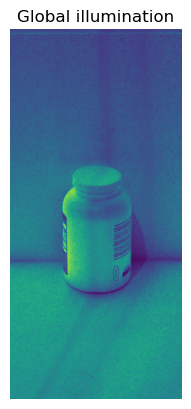

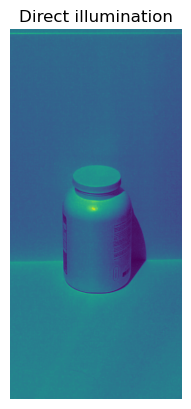

In [25]:
imgs_lin = srgb2lin(img_list[:, :, 300:800])

img_max = np.max(imgs_lin,0)  # dir + glob
img_min = np.min(imgs_lin,0)  # glob
img_glob = img_min
img_dir = img_max - img_min

plt.figure()
plt.imshow(img_glob)
plt.title('Global illumination')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(img_dir)
plt.title('Direct illumination')
plt.axis('off')
plt.show()